<a href="https://colab.research.google.com/github/sethanimesh/Image_Classifiers/blob/main/Bear_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install -q duckduckgo_search

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 38.6 MB/s eta 0:00:00


In [34]:
pip install -q fastai

ERROR: Operation cancelled by user


In [35]:
from fastai.vision.widgets import *

In [4]:
from duckduckgo_search import DDGS
from fastcore.all import *
from fastdownload import download_url
from fastai.vision.all import *

def search_images(term, max_images=100): return L(DDGS().images(term, max_results=max_images)).itemgot('image')

In [5]:
bear_types = 'grizzly bear','black bear','teddy bear'
path = Path('bears')

In [21]:
for o in bear_types:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    resize_images(path/o, max_size=400, dest=path/o)

In [22]:
fns = get_image_files(path)
fns

(#346) [Path('bears/black bear/6927c436-e29c-4507-8992-4c2cc305bf05.jpg'),Path('bears/black bear/09d4f965-6298-4c2c-b008-475d13a0d34c.jpg'),Path('bears/black bear/59a29202-8a3b-4884-bc10-06754d2d25ba.jpg'),Path('bears/black bear/96f2968e-2fd0-404e-80fe-a3386a2c0fda.jpg'),Path('bears/black bear/e7cf2aa4-bb4e-4a19-8000-47ce6f4f1c8a.jpg'),Path('bears/black bear/5d722ffa-ce50-4dad-9195-2354da96ae78.jpg'),Path('bears/black bear/640a6801-6120-4bfc-b4db-0d3822f430d7.jpg'),Path('bears/black bear/81744a8d-abc8-453a-9896-6fb5c60ff372.JPG'),Path('bears/black bear/5b8f8646-973f-4393-ade0-491d6a1cb3bd.jpg'),Path('bears/black bear/462646b7-9753-484e-885f-ce9993ba5f12.jpg')...]

In [23]:
failed = verify_images(fns)
failed

(#8) [Path('bears/black bear/81744a8d-abc8-453a-9896-6fb5c60ff372.JPG'),Path('bears/black bear/e8ae9eb2-f0d1-422c-b5a0-de5716d372f7.jpg'),Path('bears/black bear/99f79acc-18fb-40fb-9b27-2666df4e1b20.jpg'),Path('bears/black bear/9ac87ccb-bf46-47f3-9462-7c248c0f17c8.jpg'),Path('bears/grizzly bear/0df6000e-b779-446d-8fbe-d32a91d81b85.JPG'),Path('bears/grizzly bear/d0d865fb-36e5-4015-a922-dc739223eabf.jpg'),Path('bears/teddy bear/efa80af6-88ac-40ca-87be-7c4d02a74a39.jpg'),Path('bears/teddy bear/7f2a9a91-2782-456b-a3de-12e50ef6d65e.jpg')]

In [24]:
failed.map(Path.unlink);

In [25]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [26]:
dls = bears.dataloaders(path)

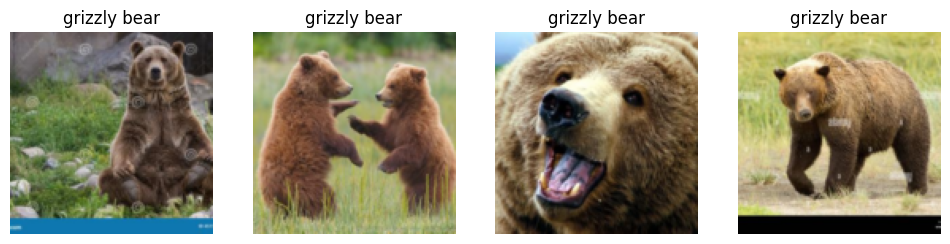

In [27]:
dls.valid.show_batch(max_n=4, nrows=1)

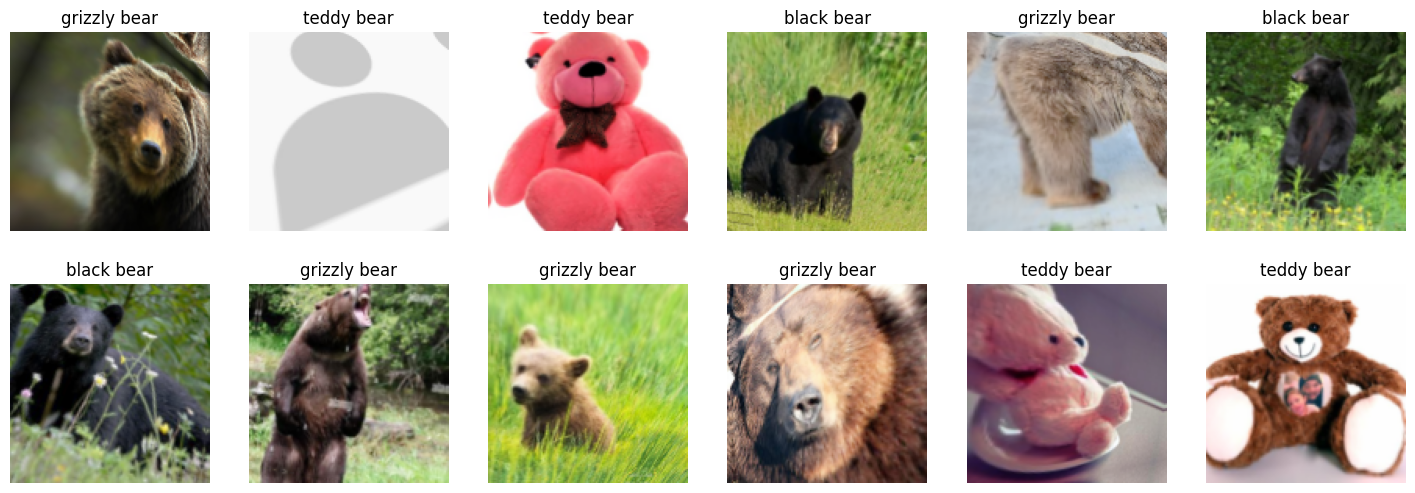

In [28]:
bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=12, nrows=2)

In [29]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears.dataloaders(path)

In [30]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.395776,0.116255,0.044776,00:01


epoch,train_loss,valid_loss,error_rate,time
0,0.251997,0.082218,0.029851,00:01
1,0.177542,0.014298,0.000000,00:01
2,0.122231,0.003915,0.000000,00:01
3,0.109474,0.002905,0.000000,00:01


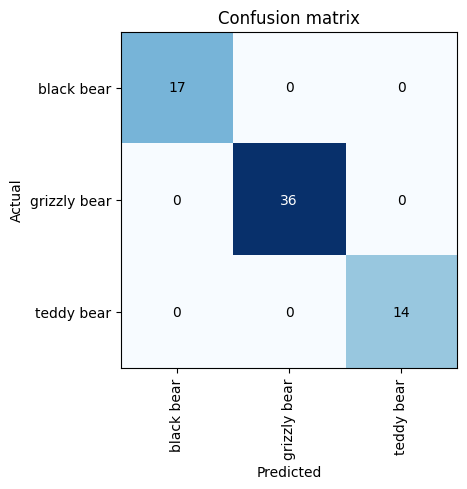

In [31]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

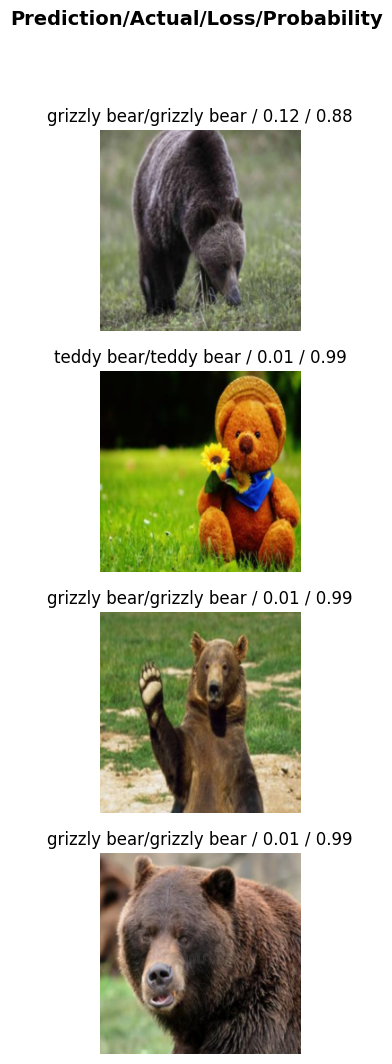

In [32]:
interp.plot_top_losses(4, nrows=4)

In [36]:
cleaner = ImageClassifierCleaner(learn)
cleaner